# Métodos de Otimização

José Ahirton Batista Lopes Filho - TIA 71760253

Até o momento apenas o algoritmo de Gradiente Descendente foi utilizado para fazer a atualização dos parâmetros e minimização de custos. Neste notebook iremos estudar métodos de otimização mais avançados que podem acelerar o processo de aprendizado e capaz de obter um valor melhor para a função de custo. O uso de um bom algoritmo de otimização pode fazer a diferença entre esperar dias vs. algumas horas para se obter um bom resultado.  

Gradiente descendente vai "morro abaixo" na função de custo $J$. Considere que o algoritmo está tentando fazer o seguinte: 
<img src="images/cost.jpg" style="width:650px;height:300px;">
<caption><center> <u> **Figura 1** </u>: **Minimizando o custo é como encontrar o ponto mais baixo em uma superfície**<br> Em cada etapa de treinamento você atualiza os parâmetros seguindo uma certa direção e tentando chegar ao ponto mais baixo na superfície. </center></caption>

**Notação**: Como sempre, $\frac{\partial J}{\partial a } = $ `da` para a variável `a`.

Para iniciar, execute o bloco abaixo para carregar as bibliotecas e arquivos necessários para este notebook. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

/Users/ahirtonlopes/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 1 - Gradiente Descendente

Um método de otimização simples em aprendizado de máquina é o gradiente descendente (GD). Quando você usa etapas de gradiente com relação a todos os $m$ exemplos em cada etapa, esta técnica é conhecida como Gradiente Descendente em Batch.  

**Exercício de aquecimento**: Implemente a regra de atualização do gradiente descendente. A regra do gradiente descendente para $l = 1, ..., L$ é: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

onde L é o número de camadas e $\alpha$ é a taxa de aprendizado. Todos os parâmetros devem ser armazenados no dicionário `parameters`. Note que a variável de interação `l` é inicializado com 0 no loop `for` porém os primeiros parâmetros são $W^{[1]}$ e $b^{[1]}$. Você irá precisar fazer um "shift" do `l` para `l+1` no código.

In [2]:
# FUNÇÃO DE AVALIAÇÃO: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Atualiza os parâmetros utilizando uma etapa do gradiente descendente
    
    Argumentos:
    parameters -- dicionário python contendo os parâmetros a serem atualizados:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- dicionário python contendo os gradientes para atualizar cada um dos parâmetros:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- a taxa de aprendizado, um escalar.
    
    Retorna:
    parameters -- dicionário python contendo os parâmetros atualizados. 
    """

    L = len(parameters) // 2 # número de camadas na rede neural

    # Regra de atualizaçãopara cada parâmetro
    for l in range(L):
        ### INICIE SEU CÓDIGO AQUI ### (aprox. 2 linhas)
        
        parameters["W" + str(l+1)] = parameters["W"+str(l+1)]-learning_rate*grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b"+str(l+1)]-learning_rate*grads["db"+str(l+1)]
        
        ### TÉRMINO DO CÓDIGO ###
        
    return parameters

In [3]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 = [[ 1.74604067]
 [-0.75184921]]
W2 = [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 = [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


**Saída esperada**:

<table> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74604067]
 [-0.75184921]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]] </td> 
    </tr> 
</table>


Uma variação deste processo é o gradiente descendente estocástico (GDE), que é equivalente ao gradiente descendente com um mini-batch com apenas um exemplo. A regra de atualização que você acabou de implementar não é alterada. O que modifica é que você irá computar os gradientes para cada exemplo em vez de considerar todo o conjunto de treinamento. Os exemplos de código abaixo ilustram a diferença entre o gradiente descendente estocástico e o gradiente descendente em batch.  

- **Gradiente Descendente em Batch**:

``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Propagação para frente.
    a, caches = forward_propagation(X, parameters)
    # Computar o custo.
    cost = compute_cost(a, Y)
    # Propagação para trás.
    grads = backward_propagation(a, caches, parameters)
    # Atualiza os parâmetros.
    parameters = update_parameters(parameters, grads)
        
```

- **Gradiente Descendente Estocástico**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Propagação para frente
        a, caches = forward_propagation(X[:,j], parameters)
        # Computar o custo
        cost = compute_cost(a, Y[:,j])
        # Propagação para trás
        grads = backward_propagation(a, caches, parameters)
        # Atualiza os parâmetros
        parameters = update_parameters(parameters, grads)
```


No Gradiente Descendente Estocástico utiliza-se apenas um exemplo de treinamento para atualizar os gradientes. Quando o conjunto de treinamento é grande GDE pode ser rápido. Mas os parâmetros oscilarão na direção do mínimo em vez de convergirem de forma mais suave. Aqui está uma ilustração deste fato: 

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Figura 2** </u><font color='purple'>  : **GDE vs GD**<br> "+" inidica o mínimo do custo. GDE executa várias oscilações para convergir. Porém, cada etapa é rápida no GDE pois ele utiliza apenas um exemplo para fazer a atualização. Já o GD se aproxima do mínimo de forma mais suave, fazendo as atualizações após uma passagem pelo conjunto de treinamento.  </center></caption>

**Nota** a implementação do GDE requer 3 loops no total:
1. Sobre o número de interações
2. Sobre cada um dos $m$ exemplos de treinamento
3. Sobre cada camada (para atualizar todos os parâmetros, de $(W^{[1]},b^{[1]})$ até $(W^{[L]},b^{[L]})$)

Na prática, você obtém resultados mais rápidos se utilizar  grupos entre um exemplo e $m$ exemplos para fazer as atualizações. O gradiente descendente em mini-batch faz exatamente isto. No gradiente descendente em mini-batch é executado um loop sobre todos os mini-batches ao invés de exemplos individuais.

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Figura 3** </u>: <font color='purple'>  **GDE vs GD em Mini-Batch**<br> "+" inidica o custo mínimo. Utilizando mini-batches no algoritmo de otimização frequentemente leva a otimizações mais rápidas.   </center></caption>

<font color='blue'>
**O que você deve lembrar**:
- A diferença entre o gradiente descendente, o gradiente descendente em mini-batch e o gradiente descendente estocástico é o número de exemplos utilizados para fazer a atualização dos parâmetros. 
- Você deve ajustar o hiper parâmetro da taxa de aprendizado $\alpha$.
- Com um tamanho de mini-batch bem ajustado, o gradiente descendente com mini-batch apresenta um melhor resultado que o gradiente descendente estocástico e o gradiente descendente em batch (particularmente quando o conjunto de treinamento é grande). 

## 2 - Gradiente Descendente em Mini-Batch

Vamos ver como construir mini-batches a partir de um conjunto de exemplos de treinamento (X, Y).

Existem duas etapas:
- **Misturar**: Criar uma versão misturada (embaralhada) do conjunto de treinamento (X, Y) como mostrado abaixo. Cada coluna de X e Y representam um exemplo de treinamento. Note que uma mistura aleatória é feita entre X e Y de forma sincronizada. De forma que, após a mistura, o $i^{ésimo}$ exemplo em X, corresponde ao $i^{ésima}$ saída em Y. O embaralhamento assegura que os exemplos serão divididos aleatoriamente em mini-batches.  

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partição**: Particionar o conjunto de exemplos misturados (X, Y) em mini-batches do tamanho `mini_batch_size` (aqui igual a 64). Note que o número de exemplos de treinamento nem sempre é divisível por `mini_batch_size` e o último mini-batch pode então ter menos exemplos, e vai parecer assim:  

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

**Exercício**: Implemente `random_mini_batches`. A parte de misturar os exemplos já está pronta. Para ajudá-lo na partição é fornecido o código que seleciona os indíces para o $1^{o}$ e o $2^{o}$ mini-batches:
```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```

Note que o último mini-batch pode ser menor que 64. $\lfloor s \rfloor$ representa $s$ arredondado para o inteiro mais próximo  (isto é `math.floor(s)` em Python). Se o número total de exemplos não é um multiplo de `mini_batch_size` então haverá $\lfloor \frac{m}{mini\_batch\_size}\rfloor$ mini-batches com `mini_batch_size` exemplos, e o número de exemplos no último mini-batch será ($m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor$). 

In [4]:
# FUNÇÃO DE AVALIAÇÃO: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Cria uma lista de mini-batches aleatórios do conjunot de treinamento (X, Y)
    
    Argumentos:
    X -- conjunto de entrada no formato (nx, m)
    Y -- vetor de saída (1 para pontos azuis / 0 para pontos vermmelhos), no formato (1, m)
    mini_batch_size --tamanho do mini-batch, um número inteiro
    
    Returna:
    mini_batches -- lista sincronizada de mini-batches (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # ajusta o gerador de números aleatórios - não modifique o valor da seed
    m = X.shape[1]                  # número de exemplos no conjunto de treinamento
    mini_batches = []
        
    # Step 1: mistura (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partição (shuffled_X, shuffled_Y). Menos o mini-batch final.
    num_complete_minibatches = math.floor(m/mini_batch_size) # número de mini batches de tamanho mini_batch_size 
    for k in range(0, num_complete_minibatches):
        ### INICIE O CÓDIGO AQUI ### (aprox. 2 linhas)
        
        mini_batch_X = shuffled_X[:,k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k*mini_batch_size:(k+1)*mini_batch_size]
        
        ### TÉRMINO DO CÓDIGO ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # ajustando o último mini-batch (último mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### INICIE O CÓDIGO AQUI ### (aprox. 2 linhas)
        
        mini_batch_X = shuffled_X[:,num_complete_minibatches*mini_batch_size:m]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches*mini_batch_size:m]
        
        ### TÉRMINO DO CÓDIGO ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [5]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("formato do 1o mini_batch_X: " + str(mini_batches[0][0].shape))
print ("formato do 2o mini_batch_X: " + str(mini_batches[1][0].shape))
print ("formato do 3o mini_batch_X: " + str(mini_batches[2][0].shape))
print ("formato do 1o mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("formato do 2o mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("formato do 3o mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("verificação do mini-batch: " + str(mini_batches[0][0][0][0:3]))

formato do 1o mini_batch_X: (12288, 64)
formato do 2o mini_batch_X: (12288, 64)
formato do 3o mini_batch_X: (12288, 20)
formato do 1o mini_batch_Y: (1, 64)
formato do 2o mini_batch_Y: (1, 64)
formato do 3o mini_batch_Y: (1, 20)
verificação do mini-batch: [ 0.90085595 -0.7612069   0.2344157 ]


**Saída esperada**:

<table style="width:50%"> 
    <tr>
    <td > **formato do 1o mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    
    <tr>
    <td > **formato do 2o mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    
    <tr>
    <td > **formato do 3o mini_batch_X** </td> 
           <td > (12288, 20) </td> 
    </tr>
    <tr>
    <td > **formato do 1o mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **formato do 2o mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **formato do 3o mini_batch_Y** </td> 
           <td > (1, 20) </td> 
    </tr> 
    <tr>
    <td > **verificação do mini-batch** </td> 
           <td > [ 0.90085595 -0.7612069   0.2344157 ] </td> 
    </tr>
    
</table>

<font color='blue'>
**O que você deve lembrar**:
- Misturar e Particionar são duas etapas requeridas para construir os mini-batches.
- Valores de potência de 2 são geralmente os tamanhos de mini-batches utilizados: 16, 32, 64, 128.

## 3 - Momento

Devido ao fato do gradiente descendente atualizar os parâmetros após "olhar" apenas um subconjunto de exemplos, a direção de atualização possui alguma variância e o caminho percorrido pelo gradiente descendente usando mini-batch deverá oscilar na direção de convergência. O uso de momento pode reduzir esta escilação.  

Momento leva em conta os últimos valores de gradientes para suavizar o processo de atualização. Iremos armazenar a direção dos gradientes anteriores na variável $v$. Formalmente, esta variável será a média ponderada exponencial dos gradientes das etapas anteriores. Você pode pensar em $v$ como a velocidade de uma bola rolando morro abaixo, adquirindo velocidade e momento de acordo com a direção do gradiente e inclinação da superfície.  

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'>**Figure 4**</u><font color='purple'>: As setas vermelhas indicam a direção tomada em uma etapa do gradiente descendente com mini-batch e momento. Os pontos azuis mostram a direção do gradiente (com relação ao mini-batch atual) em cada etapa. Ao invés de simplesmente seguir o gradiente, a influência de $v$ faz com que seja tomado um passo na direção de $v$.<br> <font color='black'> </center>


**Exercício**: Inicialize a velocidade. A velocidade $v$ é um dicionário em python que precisa ser inicializado com arrays de zeros. As chaves são as mesmas que estão no dicionário `grads`, isto é:
for $l =1,...,L$:
```python
v["dW" + str(l+1)] = ... #(array numpy de zeros com o mesmo formato dos parâmetros ["W" + str(l+1)])
v["db" + str(l+1)] = ... #(array numpy de zeros com o mesmo formato dos parâmetros["b" + str(l+1)])
```
**Nota** como já falado, a variável de interação l é inicializada com 0 para o loop 'for', porém, os primeiros parâmetros são v["dW1"] e v["db1"] (possuem índice 1). por isso fazemos um shift do l para l+1 no loop `for`.

In [6]:
# FUNÇÃO DE VELOCIDADE: initialize_velocity

def initialize_velocity(parameters):
    """
    Inicializa a velocidade como um dicionário python com:
                - chaves: "dW1", "db1", ..., "dWL", "dbL" 
                - valores: arrays numpy de zeros no mesmo formato que os gradientes/parâmetros correspondentes.
    Argumentos:
    parameters -- dicionário python contendo os parâmetros.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Retorna:
    v -- dicionário python contendo a velocidade atual.
                    v['dW' + str(l)] = velocidade de dWl
                    v['db' + str(l)] = velocidade de dbl
    """
    
    L = len(parameters) // 2 # número de camadas na rede neural
    v = {}
    
    # Inicializa a velocidade
    for l in range(L):
        ### INICIE O CÓDIGO AQUI ### (aprox. 2 linhas)
        
        v["dW" + str(l+1)] = np.zeros((parameters["W"+str(l+1)].shape[0], parameters["W"+str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b"+str(l+1)].shape[0], parameters["b"+str(l+1)].shape[1]))
        
        ### TÉRMINO DO CÓDIGO ###
        
    return v

In [7]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]


**saída esperada**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
</table>


**Exercício**:  Agora, implemente a atualização de parâmetros com momento. A regra de atualização de momento é, for $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

onde L é o número de camadas, $\beta$ é o momento e $\alpha$ é a taxa de aprendizado. Todos os parâmetros devem ser atualizados no dicionário `parameters`.  Note que a variável de interação `l` inicializa com 0 no loop `for` enquanto os primeiros parâmetros são $W^{[1]}$ e $b^{[1]}$. Logo você precisa fazer um shift de `l` para `l+1` no código.

In [8]:
# FUNÇÃO DE AVALIAÇÃO: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Atualiza os parâmetros utilizando momento
    
    Argumentos:
    parameters -- dicionário python contendo os parâmetros:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- dicionário python contendo os gradientes para cada parâmetro:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- dicionário python contendo a velocidade atual:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- o hiper parâmetro de momento, um escalar
    learning_rate -- a taxa de aprendizado, um scalar
    
    Retorna:
    parameters -- dicionário python contendo os parâmetros atualizado 
    v -- dicionário python contendo as velocidades atualizadas
    """

    L = len(parameters) // 2 # número de camadas na rede neural
    
    # Atualização de momento para cada parâmetro
    for l in range(L):
        
        ### INICIE O SEU CÓDIGO AQUI ### (aprox. 4 linhas)
        
        # determina as velocidades
        v["dW" + str(l+1)] = beta*v["dW"+str(l+1)]+(1-beta)*grads["dW"+str(l+1)]
        v["db" + str(l+1)] = beta*v["db"+str(l+1)]+(1-beta)*grads["db"+str(l+1)]
        
        # atualiza os parâmetros
        parameters["W" + str(l+1)] = parameters["W"+str(l+1)]-learning_rate*v["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b"+str(l+1)]-learning_rate*v["db"+str(l+1)]
       
        ### TÉRMINO DO CÓDIGO ###
        
    return parameters, v

In [9]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]


**Saída esperada**:

<table style="width:90%"> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74493465]
 [-0.76027113]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]] </td> 
    </tr> 

    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]</td> 
    </tr> 
</table>



**Note** que:
- A velocidade é inicializada com zeros. O algoritmo faz algumas interações para "construir" a velocidade e começa a executar "pulos" maiores.
- Se $\beta = 0$, então tem-se o gradiente descendente padrão, sem o momento. 

**Como escolher o valor de $\beta$?**

- Quanto maior o valor do hiper parâmetro de momento $\beta$, mais suave é o processo de atualização pois o processo leva em conta mais valores passados. Mas se $\beta$ for muito grande, ele pode suavizar demais as atualizações.   
- Valores comuns para $\beta$ estão na faixa entre 0.8 e 0.999. Se você não quiser ajustar o valor de $\beta$, utilizar 0.9 é um bom ponto de partida.  
- Ajustando um valor ótimo para $\beta$ no seu modelo é um processo que requer várias tentativas para ver qual valor funciona melhor para a função de custo $J$. 

<font color='blue'>
**O que você tem que lembrar**:
- Momento considera gradientes passados para suavizar as etapas do gradiente descendente. Pode ser aplicado com gradiente descendente em batch, mini-batch ou estocástico.
- Você deve ajustar o hyper parâmetro de momento $\beta$ e a taxa de aprendizado $\alpha$.

## 4 - Adam

Adam é um dos algoritmos de otimização mais efetivos para treinar redes neurais. Ele combina ideias de RMSprop e Momento. 

**Como o algoritmo Adam funciona?**
1. Ele determina uma média ponderada exponencial de gradientes passados e armazena na variável $v$ (antes da correção de bias) e $v^{corrigido}$ (com a correção de bias). 
2. Ele determina uma média ponderada exponencialdo quadrado dos gradientes passados e armazena na variável $s$ (antes da correção de bias) e $s^{corrigido}$ (com correção de bias). 
3. Ele atualiza os parâmetros em uma direção baseado na combinação das informações obtidas em "1" e "2".

A regra de atualização é, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrigido}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrigido}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrigido}_{dW^{[l]}}}{\sqrt{s^{corrigido}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
onde:
- t conta o número de etapas executadas por Adam 
- L é o número de camadas
- $\beta_1$ e $\beta_2$ são hiper parâmetros que controlam as médias ponderadas exponenciais. 
- $\alpha$ é a taxa de aprendizado.
- $\varepsilon$ é um valor pequeno para evitar divisão por zero.

Como sempre, os parâmetros serão armazenados no dicionário `parameters`.  

**Exercício**: Inicialize as variáveis $v, s$ do algoritmo Adam para armazenar os valores passados.

**Instrução**: As variáveis $v, s$ são dicionários python que precisam ser inicializadas com um array de zeros. As chaves são as mesmas para `grads`, isto é:
for $l = 1, ..., L$:
```python
v["dW" + str(l+1)] = ... #(array numpy de zeros com o mesmo formato de parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(array numpy de zeros com o mesmo formato de parameters["b" + str(l+1)])
s["dW" + str(l+1)] = ... #(array numpy de zeros com o mesmo formato de parameters["W" + str(l+1)])
s["db" + str(l+1)] = ... #(array numpy de zeros com o mesmo formato de parameters["b" + str(l+1)])

```

In [10]:
# FUNÇÃO DE AVALIAÇÃO: initialize_adam

def initialize_adam(parameters) :
    """
    Inicializa as variáveis v e s como dois dicionários python com:
                - chaves: "dW1", "db1", ..., "dWL", "dbL" 
                - valores: arrays numpy arrays de zeros no mesmo formato dos gradientes/parâmetros correspondentes.
    
    Argumentos:
    parameters -- dicionário python contendo os parâmetros.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Retorna: 
    v -- dicionário python que contém as médias ponderadas exponenciais do gradiente.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- dicionário python que contém as médias ponderadas exponenciais do quadrado do gradiente.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # número de camadas da rede neural
    v = {}
    s = {}
    
    # Inicializa v, s. Entrada: "parameters". Saída: "v, s".
    for l in range(L):
    ### INICIE SEU CÓDIGO AQUI ### (aprox. 4 linhas)
    
        v["dW" + str(l+1)] = np.zeros((parameters["W"+str(l+1)].shape[0],parameters["W"+str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b"+str(l+1)].shape[0],parameters["b"+str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters["W"+str(l+1)].shape[0],parameters["W"+str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters["b"+str(l+1)].shape[0],parameters["b"+str(l+1)].shape[1]))
    
    ### TÉRMINO DO CODIGO ###
    
    return v, s

In [11]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))


v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]
s["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = [[0.]
 [0.]]
s["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = [[0.]
 [0.]
 [0.]]


**Saída esperada**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr>

</table>


**Exercício**:  Agora, implemente a atualização de parâmetros de Adam. Lembre que a regra geral de atualização é: for $l = 1, ..., L$: 

$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrigido}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrigido}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrigido}_{W^{[l]}}}{\sqrt{s^{corrigido}_{W^{[l]}}}+\varepsilon}
\end{cases}$$


**Note** que a variável de interação `l` é inicializada com 0 no loop `for` enquanto que os parâmetros são $W^{[1]}$ e $b^{[1]}$. Você precisa de um shift de `l` para `l+1` no código.

In [12]:
# FUNÇÃO DE AVALIAÇÃO: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Atualização de parâmetros utilizando Adam
    
    Argumentos:
    parameters -- dicionário python dictionary contendo os parâmetros:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- dicionário python contendo os gradientes de cada parâmetro:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- variável do Adam, dicionário python para a média ponderada do primeiro gradiente.
    s -- variável do Adam, dicionário python para a média ponderada do gradiente ao quadrado.
    learning_rate -- a taxa de aprendizado, um escalar.
    beta1 -- hiper parâmetro para estimativa do primeiro momento - redução exponencial. 
    beta2 -- hiper parâmetro para estimativa do segundo momento - redução exponencial. 
    epsilon -- hiper parâmetro para prevenir a divisão por 0 na atualização de Adam. 

    Retorna:
    parameters -- dicionário python contendo os parâmetros atualizados 
    v -- variável do Adam, média móvel do primeiro gradiente, um dicionário python
    s -- variável do Adam, média móvel do gradiente ao quadrado, um dicionário python
    """
    
    L = len(parameters) // 2                 # número de camadas na rede neural
    v_corrected = {}                         # Inicializa um estimador do primeiro momento, dicionário python
    s_corrected = {}                         # Inicializa um estimador do segundo momento, dicionário python
    
    # Executa a atualização de Adam sobre todos os parâmetros
    for l in range(L):
        
        # Média móvel dos gradientes. Entradas: "v, grads, beta1". Saída: "v".
        
        ### INICIE SEU CÓDIGO AQUI ### (aprox. 2 linhas)
        
        v["dW" + str(l+1)] = beta1*v["dW"+str(l+1)]+(1-beta1)*grads["dW"+str(l+1)]
        v["db" + str(l+1)] = beta1*v["db"+str(l+1)]+(1-beta1)*grads["db"+str(l+1)]
        
        ### TÉRMINO DO CÓDIGO ###

        # Computa a correção de bias para o estimador do primeiro momento. Entrada: "v, beta1, t". Saída: "v_corrected".
        
        ### INICIE SEU CÓDIGO AQUI ### (aprox. 2 linhas)
        
        v_corrected["dW" + str(l+1)] = v["dW"+str(l+1)]/(1-np.power(beta1,t))
        v_corrected["db" + str(l+1)] = v["db"+str(l+1)]/(1-np.power(beta1,t))
        
        ### TÉRMINO DO CÓDIGO ###

        # Média móvel do gradiente ao quadrado. Entrada: "s, grads, beta2". Saída: "s".
        
        ### INICIE SEU CÓDIGO AQUI ### (aprox. 2 linhas)
        
        s["dW" + str(l+1)] =  beta2*s["dW"+str(l+1)]+(1-beta2)*np.power(grads["dW"+str(l+1)],2)
        s["db" + str(l+1)] = beta2*s["db"+str(l+1)]+(1-beta2)*np.power(grads["db"+str(l+1)],2)
        
        ### TÉRMINO DO CÓDIGO ###

        # Computa a correção de bias do segundo estimador de momento. Entrada: "s, beta2, t". Saída: "s_corrected".
        
        ### INICIE SEU CÓDIGO AQUI ### (aprox. 2 linhas)
        
        s_corrected["dW" + str(l+1)] = s["dW"+str(l+1)]/(1-np.power(beta2,t))
        s_corrected["db" + str(l+1)] = s["db"+str(l+1)]/(1-np.power(beta2,t))
        
        ### TÉRMINO DO CÓDIGO ###

        # Atualiza os parâmetros. Entrada: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Saída: "parameters".
        
        ### INICIE SEU CÓDIGO AQUI ### (aprox. 2 linhas)
        
        parameters["W" + str(l+1)] = parameters["W"+str(l+1)]-learning_rate*(v_corrected["dW"+str(l+1)]/np.sqrt(s_corrected["dW"+str(l+1)]+epsilon))
        parameters["b" + str(l+1)] = parameters["b"+str(l+1)]-learning_rate*(v_corrected["db"+str(l+1)]/np.sqrt(s_corrected["db"+str(l+1)]+epsilon))
        
        ### TÉRMINO DO CÓDIGO ###

    return parameters, v, s

In [13]:
parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))

W1 = [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = [[ 1.75225313]
 [-0.75376553]]
W2 = [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = [[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = [[1.51020075e-05]
 [8.75664434e-04]]
s["dW2"] = [[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db2"] = [[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


**Saída esperada**:

<table> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.75225313]
 [-0.75376553]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]] </td> 
    </tr> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.00121136  0.00131039  0.00081287]
 [ 0.0002525   0.00081154  0.00046748]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[  1.51020075e-05]
 [  8.75664434e-04]] </td> 
    </tr> 
    
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[  7.17640232e-05   2.81276921e-04   4.78394595e-04]
 [  1.57413361e-04   4.72206320e-04   7.14372576e-04]
 [  4.50571368e-04   1.60392066e-07   1.24838242e-03]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[  5.49507194e-05]
 [  2.75494327e-03]
 [  5.50629536e-04]] </td> 
    </tr>
</table>


Agora você tem três algoritmos de otimização funcionando (gradiente descendente com mini-batch, Momento e Adam). Vamos implementar um modelo com cada uma destas otimizações e observar as diferenças. 

## 5 - Modelo com algoritmos diferentes de otimização

Vamos utilizar a base de dados "moons" para testar os métodos de otimização. (A base de dados é chamada de "moons" porque os dados de cada uma das duas classes parecem um pouco com uma lua crescente). 

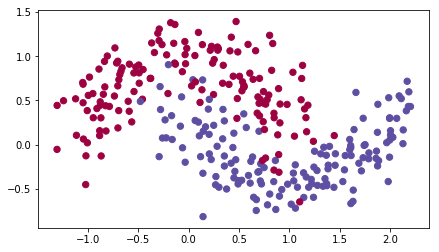

In [14]:
train_X, train_Y = load_dataset()

Você irá utilizar uma rede neural com 3 camadas já desenvolvida. Você deverá treiná-la com: 
- **Gradiente Descendente com Mini-batch**: que deve chamar a sua função:
    - `update_parameters_with_gd()`
- **Momento com Mini-batch**: que deve chamar as suas funções:
    - `initialize_velocity()` e `update_parameters_with_momentum()`
- **Adam com Mini-batch**: que deve chamar as suas funções:
    - `initialize_adam()` e `update_parameters_with_adam()`

In [15]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    Modelo de rede neural de 3 camadas que pode utilizar modelos diferentes de otimização.
    
    Argumentos:
    X -- dados de entrada, no formato (2, número de exemplos)
    Y -- vetor com os valores de saída (1 para ponto azul / 0 para ponto vermelho), no formato (1, número de exemplos)
    layers_dims -- uma lista python, contendo o tamanho de cada camada
    learning_rate -- a taxa de aprendizado, um escalar.
    mini_batch_size -- o tamanho de cada mini-batch
    beta -- hiper-parâmetro de Momento
    beta1 -- hiper-parâmetro de queda exponencial para o estimador dos gradientes. 
    beta2 -- hiper-parâmetro de queda exponencial para o estimador dos gradientes ao quadrado. 
    epsilon -- hiper-parâmetro para evitar a divisão por 0 nas atualizações de Adam.
    num_epochs -- número de épocas
    print_cost -- se Verdade imprime o custo a cada 1000 épocas

    Retorna:
    parameters -- dicionário python contendo os parâmetros atualizados 
    """

    L = len(layers_dims)             # número de camadas na rede neural
    costs = []                       # usado para armazenar os valores de custo
    t = 0                            # inicialização do contador para a atualização de Adam.
    seed = 10                        # inicializa a semente do gerador de números aleatórios. Não alterar este valor.
    
    # Inicializa os parâmetros
    parameters = initialize_parameters(layers_dims)

    # Inicializa o otimizador
    if optimizer == "gd":
        pass # o gradiente descendente não requer inicialização
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Loop de otimização
    for i in range(num_epochs):
        
        # Define os mini-batches aleatoriamente. Incrementa-se a semente para que a ordem dos exemplos seja diferente em cada época.       seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Seleciona um mini-batch
            (minibatch_X, minibatch_Y) = minibatch

            # Propagação para frente
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Determina o custo
            cost = compute_cost(a3, minibatch_Y)

            # Propagação para trás
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Atualiza os parâmetros
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # contador da Adam
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Imprime o custo após 100 épocas
        if print_cost and i % 1000 == 0:
            print ("Custo após a época %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    # mostra o custo
    plt.plot(costs)
    plt.ylabel('custo')
    plt.xlabel('épocas (por 100)')
    plt.title("Taxa de aprendizado = " + str(learning_rate))
    plt.show()

    return parameters

Agora você irá executar esta rede neural de 3 camadas com cada um dos métods de otimização.

### 5.1 - Gradiente Descendente com Mini-batch

Execute o código abaixo para ver como o modelo funciona com o Gradiente Descendente com Mini-batch.

Custo após a época 0: 0.709550
Custo após a época 1000: 0.672733
Custo após a época 2000: 0.643505
Custo após a época 3000: 0.619351
Custo após a época 4000: 0.598353
Custo após a época 5000: 0.580193
Custo após a época 6000: 0.562638
Custo após a época 7000: 0.547293
Custo após a época 8000: 0.535597
Custo após a época 9000: 0.509712


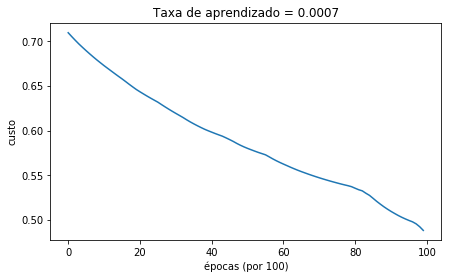

Accuracy: 0.7966666666666666


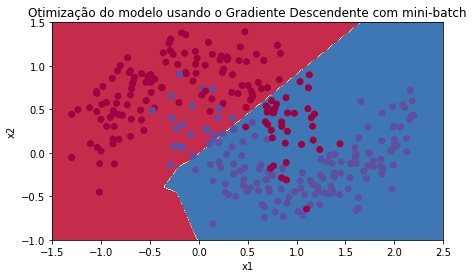

In [16]:
# treinar o modelo de 3 camadas
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predição
predictions = predict(train_X, train_Y, parameters)
# Plota olimite de decisão encontrado
plt.title("Otimização do modelo usando o Gradiente Descendente com mini-batch")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y[0,:])

### 5.2 - Gradiente Descendente com Mini-batch e Momento

Execute o código abaixo para ver como o modelo se comporta com o uso de momento. Como este exemplo é bem simples o ganho no uso de momento é pequeno; porém, para exemplos mais complexos é possível observar ganhos mais significativos. 

Custo após a época 0: 0.709576
Custo após a época 1000: 0.672790
Custo após a época 2000: 0.643575
Custo após a época 3000: 0.619428
Custo após a época 4000: 0.598411
Custo após a época 5000: 0.580265
Custo após a época 6000: 0.562730
Custo após a época 7000: 0.547361
Custo após a época 8000: 0.535709
Custo após a época 9000: 0.509887


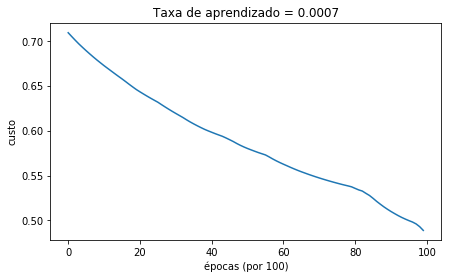

Accuracy: 0.7966666666666666


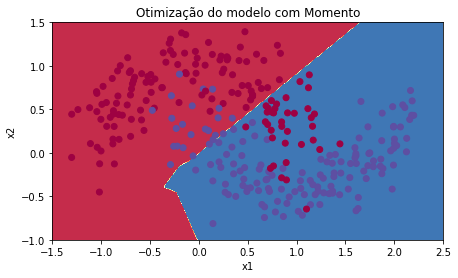

In [17]:
# treinamento do modelo de 3 camadas
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predição
predictions = predict(train_X, train_Y, parameters)

# Plota a borda de decisão
plt.title("Otimização do modelo com Momento")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y[0,:])

### 5.3 - Otimização utilizando Mini-batch com Adam

Execute o código abaixo para ver como o modelo se comporta utilizando Adam.

Custo após a época 0: 0.708437
Custo após a época 1000: 0.155727
Custo após a época 2000: 0.127277
Custo após a época 3000: 0.122448
Custo após a época 4000: 0.124640
Custo após a época 5000: 0.123375
Custo após a época 6000: 0.122651
Custo após a época 7000: 0.117137
Custo após a época 8000: 0.115803
Custo após a época 9000: 0.115501


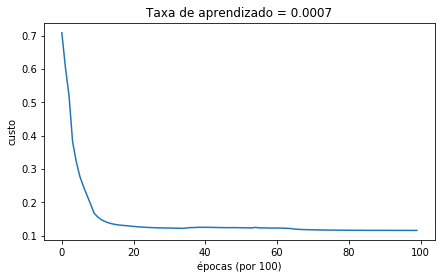

Accuracy: 0.9366666666666666


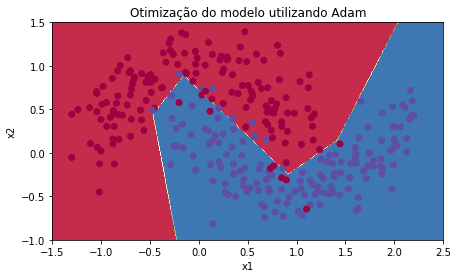

In [18]:
# treinar o modelo de 3 camadas
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predição
predictions = predict(train_X, train_Y, parameters)

# Plota a borda de decisão
plt.title("Otimização do modelo utilizando Adam")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y[0,:])

### 5.4 - Resumo

<table> 
    <tr>
        <td>
        **Método de otimização**
        </td>
        <td>
        **Precisão**
        </td>
        <td>
        **Formato do custo**
        </td>

    </tr>
        <td>
        Gradiente descendente mini-batch
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscilações
        </td>
    <tr>
        <td>
        Momento
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscilações
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
        <td>
        suave
        </td>
    </tr>
</table> 

Momento geralmente auxilia, porém com uma taxa de aprendizado baixa e uma base de dados simples seu impacto é pequeno. Um outro problema são as oscilações vistas na função de custo devido ao uso de mini-batch. 

Adam, por outro lado, claramente tem um desempenho melhor que o uso de mini-batch e momento. Se você executar mais épocas, mesmo nesta base de dados simples, todos os 3 modelos devem convergir para resultados melhores mas o método de Adam deve convergir de forma mais rápida. 

Algumas vantagens do método de Adam inclui:
- Requer uma quantidade de memória relativamente baixa, porém maior que o gradiente descendente com mini-batch ou com momento. 
- Usualmente funciona bem com pouco ajuste dos hiper parâmetros, exceto $\alpha$.

**Referências**:

- Artigo Adam: https://arxiv.org/pdf/1412.6980.pdf